## Importação das bibliotecas

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud


## Criação do dataFrame a partir do csv
limpeza de campos que não serão utilizados na análise

In [8]:
df_original = pd.read_csv('./teste_indicium_precificacao.csv')

In [9]:
df = df_original.copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Retirada de linhas onde o custo do aluguel é 0 -- considerado como valor errado

In [10]:
print(df.size)
df = df[df['price'] != 0] # retirando os dados em que o preço seja 0 
print(df.shape) # - 48883 linhas por 16 colunas de dados

782304
(48883, 16)


# 1. Análise exploratória de dados

## Gráfico de analise da média de preço por tipo de quarto

É possível perceber pelos gráficos, que o grupo de bairro manhattan apresenta uma maior média de preço por noite  -- 

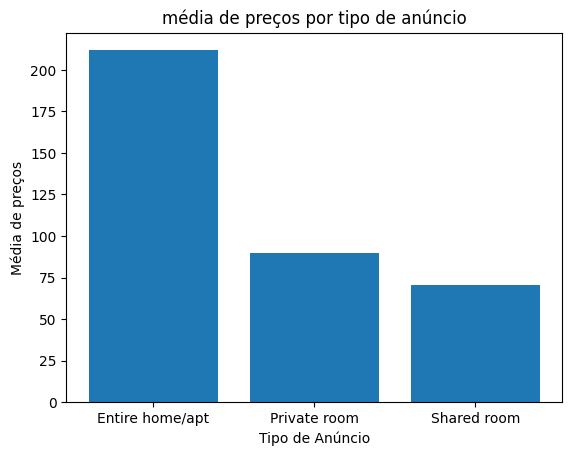

In [11]:
df_filtered_room_type = df.groupby('room_type', as_index=False, observed=True)['price'].mean()

fig, ax = plt.subplots()

ax.bar(df_filtered_room_type['room_type'], df_filtered_room_type['price'])
ax.set_title('média de preços por tipo de anúncio')
ax.set_xlabel('Tipo de Anúncio')
ax.set_ylabel('Média de preços')

plt.show()

## Quantos tipos de anúncio existem no total?
é possível perceber que manhattan tem uma maior quantidade de anuncios de casa e apartamentos inteiros, que coincidem com a maior o tipo de quarto com maior média de preços
enquanto todos os outros 4 principais bairros possuem mais anuncios de quartos privados

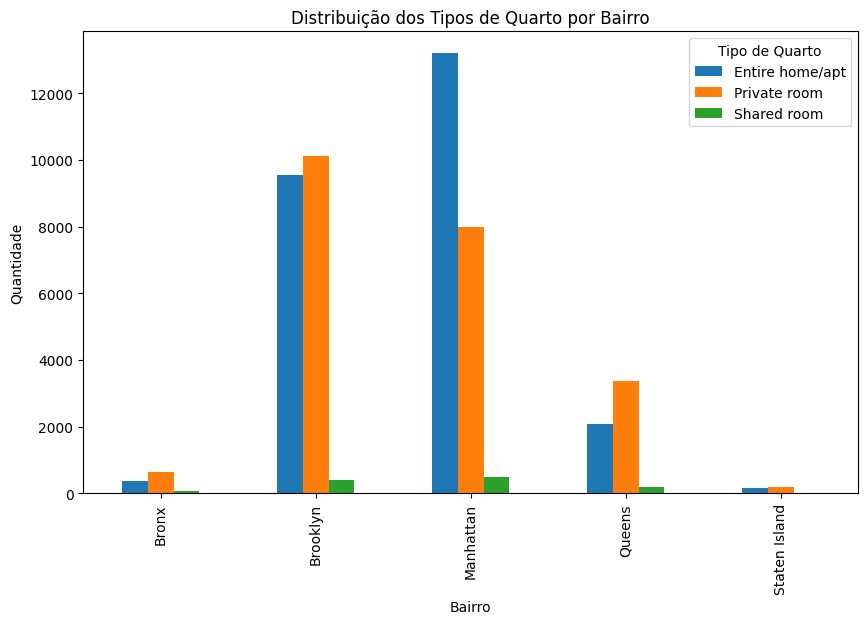

room_type,Entire home/apt,Private room,Shared room,Total
bairro_group,,,,
Bronx,379,651,60,1090
Brooklyn,9558,10125,411,20094
Manhattan,13198,7982,480,21660
Queens,2096,3372,198,5666
Staten Island,176,188,9,373
Total,25407,22318,1158,48883


In [12]:
room_type_counts = df.groupby(['bairro_group', 'room_type']).size().unstack(fill_value=0)
room_type_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.xlabel('Bairro')
plt.ylabel('Quantidade')
plt.title('Distribuição dos Tipos de Quarto por Bairro')
plt.legend(title='Tipo de Quarto')
plt.show()

room_type_counts.loc['Total'] = room_type_counts.sum()
room_type_counts['Total'] = room_type_counts.sum(axis=1)
display(room_type_counts)


## Gráfico de analise da média de preço por Grupo de bairro

É possível perceber pelo gráfico, que o grupo de bairro manhattan apresenta uma maior média de preço por noite  -- 

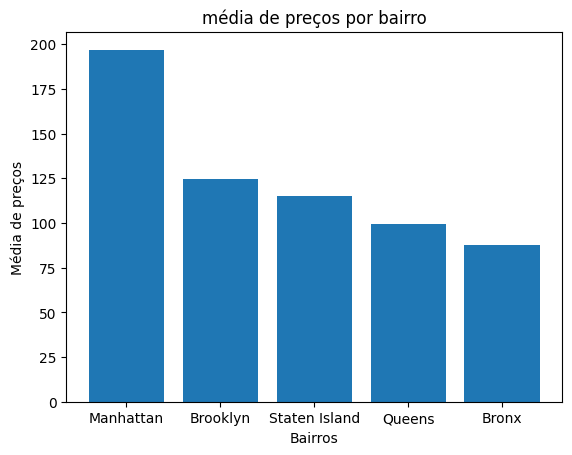

In [13]:
df_filtered_bairro_group = df.groupby('bairro_group', as_index=False, observed=True)['price'].mean().sort_values(by='price', ascending=False)
fig, ax = plt.subplots()

ax.bar(df_filtered_bairro_group['bairro_group'], df_filtered_bairro_group['price'])
ax.set_title('média de preços por bairro')
ax.set_xlabel('Bairros')
ax.set_ylabel('Média de preços')

plt.show()


## Gráfico de analise da média de preço por bairro

Observando os 5 bairros com a maior média de preço por noite, é possível ver que por mais que manhattan tenha a melhor media geral, os bairros que tem maior media de preço são: fort wadsworth e woodrow, ambos de staten Island

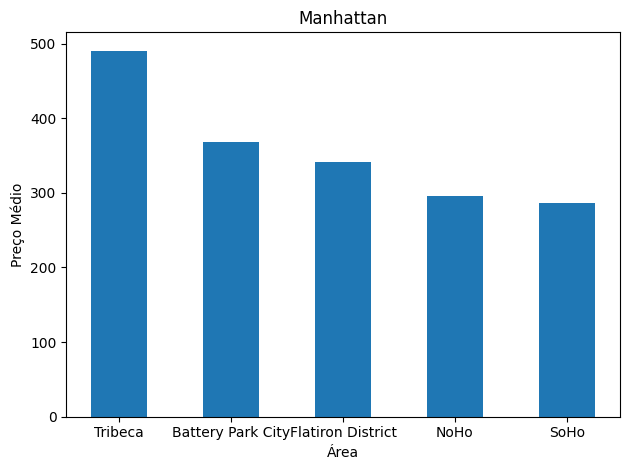

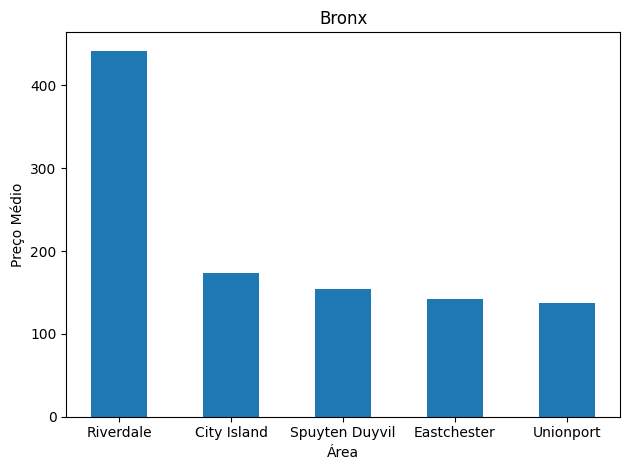

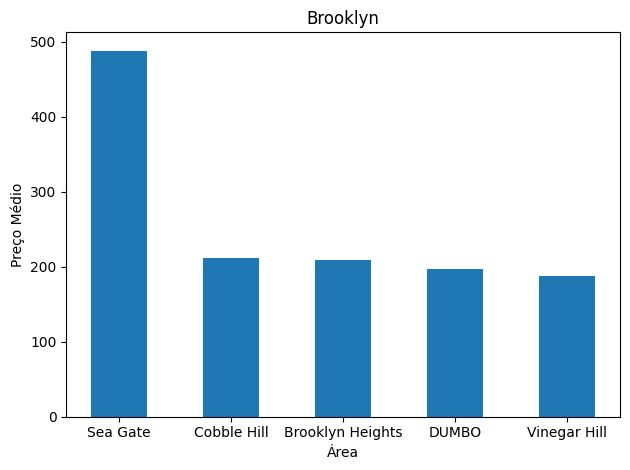

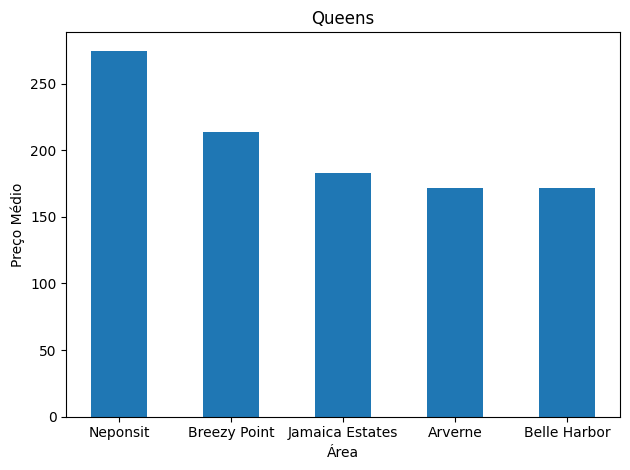

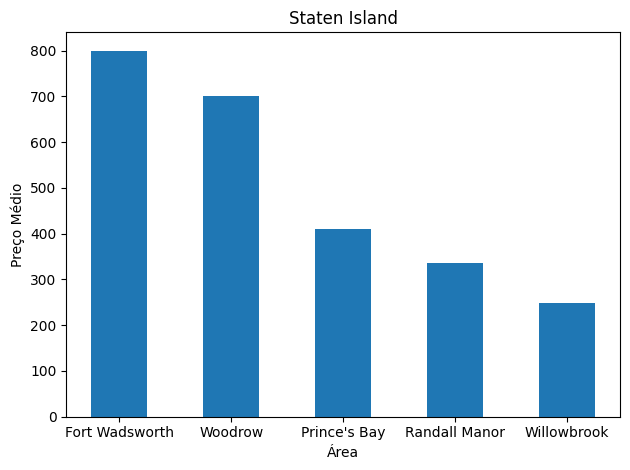

<Figure size 640x480 with 0 Axes>

In [14]:
df_filtered_bairro = df.groupby(['bairro', 'bairro_group'], as_index=False, observed=True)['price'].mean()
df_Manhattan = df_filtered_bairro[df_filtered_bairro['bairro_group'] == 'Manhattan'].sort_values(by='price', ascending = False)
df_Bronx = df_filtered_bairro[df_filtered_bairro['bairro_group'] == 'Bronx'].sort_values(by='price', ascending = False)
df_Brooklyn = df_filtered_bairro[df_filtered_bairro['bairro_group'] == 'Brooklyn'].sort_values(by='price', ascending = False)
df_Queens = df_filtered_bairro[df_filtered_bairro['bairro_group'] == 'Queens'].sort_values(by='price', ascending = False)
df_Staten_island = df_filtered_bairro[df_filtered_bairro['bairro_group'] == 'Staten Island'].sort_values(by='price', ascending = False)

def plotar_grafico_barra(df, bairro_group):
    plt.figure()
    plt.bar(df['bairro'].head(5), df['price'].head(5), width=0.5)
    plt.title(bairro_group)
    plt.xlabel('Área')
    plt.ylabel('Preço Médio')
    plt.tight_layout()
    plt.show()
    plt.close()

plotar_grafico_barra(df_Manhattan, 'Manhattan')
plotar_grafico_barra(df_Bronx, 'Bronx')
plotar_grafico_barra(df_Brooklyn, 'Brooklyn')
plotar_grafico_barra(df_Queens, 'Queens')
plotar_grafico_barra(df_Staten_island, 'Staten Island')

plt.tight_layout()
plt.show()

## Entendo melhor porque a média dos bairros de Staten Island é maior
Como os bairros com maior média de Staten Island só tem um anuncio, pode ser considerado como outlier

In [15]:
print('Bairros de Staten Island ')
print('quantidade totais de anúncios em Staten Island', len(df[(df['bairro_group'] == 'Staten Island')]))
print('quantidade de anúncios em FortWadworth:', len(df[(df['bairro_group'] == 'Staten Island') & (df['bairro'] == 'Fort Wadsworth')]))
print('quantidade de anúncios em Woodrow:', len(df[(df['bairro_group'] == 'Staten Island') & (df['bairro'] == 'Woodrow')]))
print('quantidade de anúncios em Princes Bay:', len(df[(df['bairro_group'] == 'Staten Island') & (df['bairro'] == "Prince's Bay")]))
print('quantidade de anúncios em Randall Manor:', len(df[(df['bairro_group'] == 'Staten Island') & (df['bairro'] == 'Randall Manor')]))
print('quantidade de anúncios em Willowbrook:', len(df[(df['bairro_group'] == 'Staten Island') & (df['bairro'] == 'Willowbrook')]))


print('\nBairros de Manhattan ')
print('quantidade totais de anúncios em manhattan', len(df[(df['bairro_group'] == 'Manhattan')]))
print('quantidade de anúncios em Tribeca:', len(df[(df['bairro_group'] == 'Manhattan') & (df['bairro'] == 'Tribeca')]))
print('quantidade de anúncios em Battery Park City:', len(df[(df['bairro_group'] == 'Manhattan') & (df['bairro'] == 'Battery Park City')]))
print('quantidade de anúncios em Flatiron District:', len(df[(df['bairro_group'] == 'Manhattan') & (df['bairro'] == 'Flatiron District')]))
print('quantidade de anúncios em NoHo:', len(df[(df['bairro_group'] == 'Manhattan') & (df['bairro'] == 'NoHo')]))
print('quantidade de anúncios em SoHO:', len(df[(df['bairro_group'] == 'Manhattan') & (df['bairro'] == 'SoHo')]))

print('\n\nMais informações sobre o anuncio em Fort Wadsworth')
print('quantidade de reviews:', df[df['bairro'] == 'Fort Wadsworth']['numero_de_reviews'].sum())
print('Disponibilidade:', df[df['bairro'] == 'Fort Wadsworth']['disponibilidade_365'].sum())
# preço alto, alta disponibilidade, mas sem review, provavelmente pouca demanda


Bairros de Staten Island 
quantidade totais de anúncios em Staten Island 373
quantidade de anúncios em FortWadworth: 1
quantidade de anúncios em Woodrow: 1
quantidade de anúncios em Princes Bay: 4
quantidade de anúncios em Randall Manor: 19
quantidade de anúncios em Willowbrook: 1

Bairros de Manhattan 
quantidade totais de anúncios em manhattan 21660
quantidade de anúncios em Tribeca: 177
quantidade de anúncios em Battery Park City: 70
quantidade de anúncios em Flatiron District: 80
quantidade de anúncios em NoHo: 78
quantidade de anúncios em SoHO: 358


Mais informações sobre o anuncio em Fort Wadsworth
quantidade de reviews: 0
Disponibilidade: 365


## O número de noites e disponibilidade interfere no preço?

Dados de disponibilidade de quarto em Manhattan


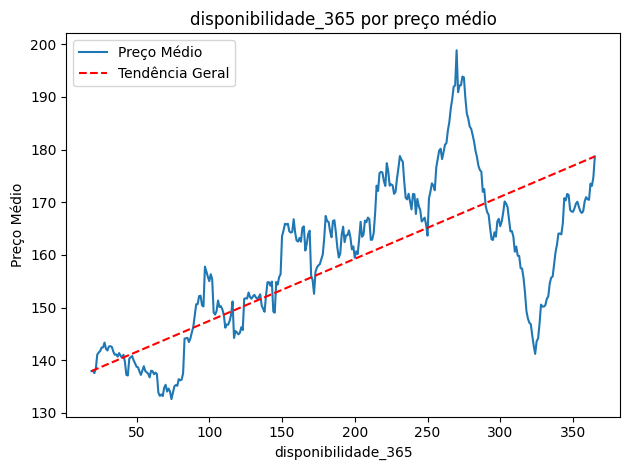

                     disponibilidade_365    price
disponibilidade_365              1.00000  0.70147
price                            0.70147  1.00000
Dados de quantidade minimas de noite dos anúncios em Manhattan


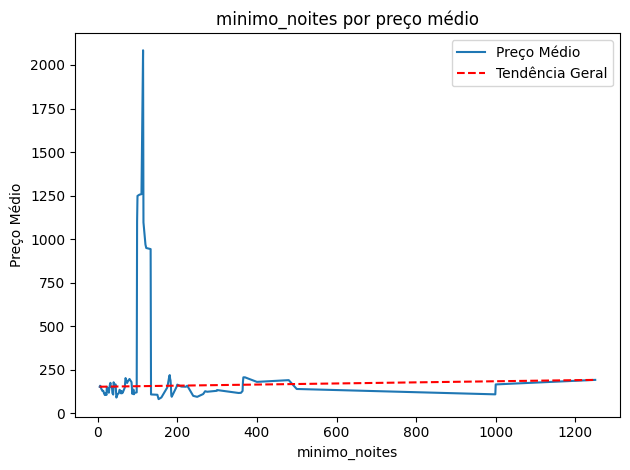

               minimo_noites    price
minimo_noites        1.00000 -0.03145
price               -0.03145  1.00000


In [16]:
def plotar_grafico_linha(df, titulo):
    plt.figure()
    plt.plot(df[titulo], df['price'], label='Preço Médio') 
    plt.plot([df[titulo].iloc[0], df[titulo].iloc[-1]],
             [df['price'].iloc[0], df['price'].iloc[-1]], 'r--', label='Tendência Geral')
    
    plt.title(f'{titulo} por preço médio')
    plt.xlabel(titulo)
    plt.ylabel('Preço Médio')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
print('Dados de disponibilidade de quarto em Manhattan')

df_disponibilidade = df.groupby('disponibilidade_365', as_index=False, observed=True)['price'].mean()
df_disponibilidade['price'] = df_disponibilidade['price'].rolling(window=20).mean()
df_disponibilidade = df_disponibilidade.dropna()
plotar_grafico_linha(df_disponibilidade, 'disponibilidade_365')
print(df_disponibilidade.corr())


print('Dados de quantidade minimas de noite dos anúncios em Manhattan')

df_qtd_noites = df.groupby('minimo_noites', as_index=False, observed=True)['price'].mean()
df_qtd_noites['price'] = df_qtd_noites['price'].rolling(window=5).mean()
df_qtd_noites = df_qtd_noites.dropna()

plotar_grafico_linha(df_qtd_noites, 'minimo_noites')
print(df_qtd_noites.corr())




## Verificação de palavras no nome:

para verificarmos se tem algum padrão no texto do nome em lugares de alto padrão, primeiros vamo separar a base em 2, sendo somente 10% dos anúncios considerados como de alto valor

In [17]:
percentil = df_original['price'].quantile(0.90)
acima_da_percentil = df_original[df_original['price'] > percentil]
abaixo_do_percentil = df_original[df_original['price'] <= percentil]
print('valor de corte do percentil de 90%:', percentil)
print('quantidade de dados acima do percentil:', len((acima_da_percentil['price'])))
print('quantidade de dados abaixo do percentil:', len((abaixo_do_percentil['price'])))

valor de corte do percentil de 90%: 269.0
quantidade de dados acima do percentil: 4878
quantidade de dados abaixo do percentil: 44016


criação de uma nuvem de palavras para os anúncios com valores acima do percentil e criação da nuvem de palavras para os anúncios com valores abaixo do percentil


anúncios acima do percentil


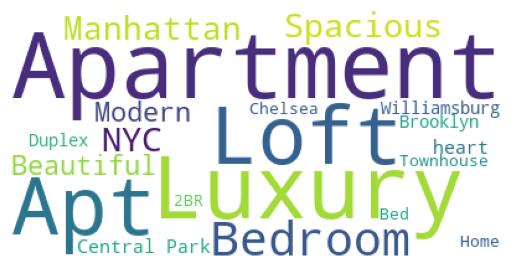

anúncios abaixo do percentil


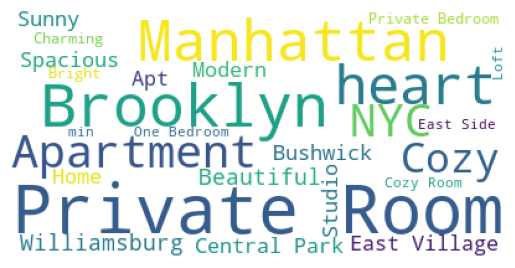

In [19]:
print('anúncios acima do percentil')
nomes = acima_da_percentil['nome'].dropna().values
wc = WordCloud(min_font_size = 10, max_font_size = 200, 
               background_color = "white", relative_scaling=0.5)

wc.generate(" ".join(nomes))

plt.imshow(wc)
plt.axis("off")

plt.show()

print('anúncios abaixo do percentil')
nomes = abaixo_do_percentil['nome'].dropna().values
wc = WordCloud(min_font_size = 10, max_font_size = 200, 
               background_color = "white", relative_scaling=0.5)

wc.generate(" ".join(nomes))

plt.imshow(wc)
plt.axis("off")
plt.show()

# 2. perguntas

### A. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
Com esses dados é possível perceber que o mais rentável são anúncios de apartamentos e casas inteiras em manhattan, com destaque especial para a área Tribeca

### B. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
é possível verificar que conforme maior a disponibilidade do anúncio, maior o preço dele, enquanto que a quantidade minima de noites necessárias não influencia no preço

### C. Existe algum padrão no texto do nome do local para lugares de mais alto valor?
Utilizando as nuvens de palavras, podemos ver que os anúncios acima do percentil, enfatizam mais palavras que trazem uma sensação de espaço de alto padrão, como 'luxury', e palavras que indicam o tipo do anúncio como: 'loft', 'apartament', 'apt'. tipo esse que como visto anteriormente possuem uma média de preço mais elevado

Agora na nuvem de palavras dos anúncios abaixo do percentil, foca mais em anuncios de private room 

# 3. previsão do preço a partir dos dados

## Criação do modelo

## Tratando os dados e criando o modelo de regressão linear para predição de preço

In [20]:
## criando um df exclusivo para predição
dados_predicao = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}



como algumas coordenadas estavam es escala diferente, com valores muitos distintos, é necessário corrigir, para que não influencie no treinamento do modelo

In [21]:
def corrigir_coordenadas(lat, lon):
    if lat > 90 or lat < -90:
        lat = lat / 10
    if ((lat < 10 and lat > 0) or (lat > -10 and lat < 0)):
         lat = lat * 10
    if lon > 180 or lon < -180:
            lon = lon / 10
    if ((lon < 10 and lon > 0) or (lon > -10 and lon < 0)):
        lon = lon * 10
    
    return lat, lon

### tratando dados, categorizando os textos em numeros, para poder ser possível montar a correlação e o treinamento do modelo

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

label_encoder = LabelEncoder()
scaler = MinMaxScaler()
df_predicao_original = pd.DataFrame([dados_predicao])
df_target = df_original['price']

df_model = df_original.drop(['id', 'nome'], axis=1)
df_predicao = df_predicao_original.drop(['id', 'nome'], axis=1)

df_model[['latitude', 'longitude']] = df_model.apply(lambda row: corrigir_coordenadas(row['latitude'], row['longitude']), axis=1, result_type='expand')
df_predicao[['latitude', 'longitude']] = df_predicao.apply(lambda row: corrigir_coordenadas(row['latitude'], row['longitude']), axis=1, result_type='expand')

df_model['bairro'] = label_encoder.fit_transform(df_model['bairro'])
df_predicao['bairro'] = label_encoder.fit_transform(df_predicao['bairro'])

df_model['bairro_group'] = label_encoder.fit_transform(df_model['bairro_group'])
df_predicao['bairro_group'] = label_encoder.fit_transform(df_predicao['bairro_group'])

df_model['room_type'] = label_encoder.fit_transform(df_model['room_type'])
df_predicao['room_type'] = label_encoder.transform(df_predicao['room_type'])

df_model['host_name'] = label_encoder.fit_transform(df_model['host_name'])
df_predicao['host_name'] = label_encoder.transform(df_predicao['host_name'])

df_model['ultima_review'] = label_encoder.fit_transform(df_model['ultima_review'])
df_predicao['ultima_review'] = label_encoder.transform(df_predicao['ultima_review'])

df_model['reviews_por_mes'] = df_model['reviews_por_mes'].fillna(0)

colunas_para_transformar = df_model.drop(columns=['price'])
df_model = df_model.drop('price', axis='columns')

df_model_scaled = pd.DataFrame(scaler.fit_transform(df_model), columns=colunas_para_transformar.columns)
df_predicao_scaled = pd.DataFrame(scaler.transform(df_predicao), columns=colunas_para_transformar.columns)
df_model_scaled['price'] = df_target

display(df_predicao_scaled.head())
display(df_model_scaled.head(1))


,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,0.000001,0.417831,0.0,0.0,0.614199,0.490469,0.0,0.0,0.071542,0.972222,0.006496,0.003067,0.972603


,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,price
0,0.000001,0.417831,0.5,0.577273,0.614199,0.490469,0.0,0.0,0.071542,0.972222,0.006496,0.003067,0.972603,225


In [23]:
print(df_model_scaled.corr()['price'])

host_id                          0.015309
host_name                        0.001298
bairro_group                     0.044246
bairro                           0.062057
latitude                         0.033939
longitude                       -0.150020
room_type                       -0.249351
minimo_noites                    0.042799
numero_de_reviews               -0.047954
ultima_review                    0.014269
reviews_por_mes                 -0.050564
calculado_host_listings_count    0.057472
disponibilidade_365              0.081833
price                            1.000000
Name: price, dtype: float64


Como nem todos os dados tem uma correção forte com a variação do preço, podemos excluir alguns dados do treinamento que possam influenciar negativamente o aprendizado, pois não existe praticamente padrão a ser interpretado na relação entre esses dados e o preço

In [24]:
correlacao = df_model_scaled.corr()['price']
corte = 0.06 # retirando todos os que estiverem com relação menor que 0.06 - numero baixo pois praticamente nenhum deu um valor alto
colunas_para_manter = [atributo for atributo, valor in correlacao.items() if valor > corte or valor < -corte]
print(colunas_para_manter)
df_model_scaled = df_model_scaled[colunas_para_manter]

['bairro', 'longitude', 'room_type', 'disponibilidade_365', 'price']


Como foi possível ver anteriormente, existem outliers que fogem muito do padrão dos dados, e isso pode impactar negativamente o aprendizado do modelo, portanto é necessário remove-los 

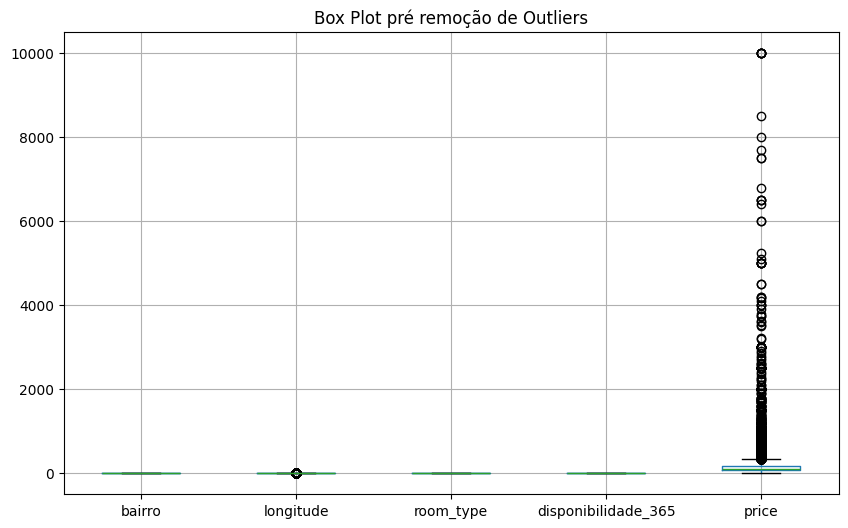

In [25]:
import matplotlib.pyplot as plt

# box plot pra verificar outliers
plt.figure(figsize=(10, 6))
df_model_scaled.boxplot()
plt.title('Box Plot pré remoção de Outliers')
plt.show()

In [26]:
#remocao de outliers por método IQR 1.5 vezes acima do 3 quartil ou abaixo do primeiro
Q1 = df_model_scaled.quantile(0.25)
Q3 = df_model_scaled.quantile(0.75)
IQR = Q3 - Q1

corte = 1.5

df_model_scaled = df_model_scaled[~((df_model_scaled < (Q1 - corte * IQR)) | (df_model_scaled > (Q3 + corte * IQR))).any(axis=1)]
print('quantidade de dados após a remoção dos outliers:', len(df_model_scaled))


quantidade de dados após a remoção dos outliers: 43159


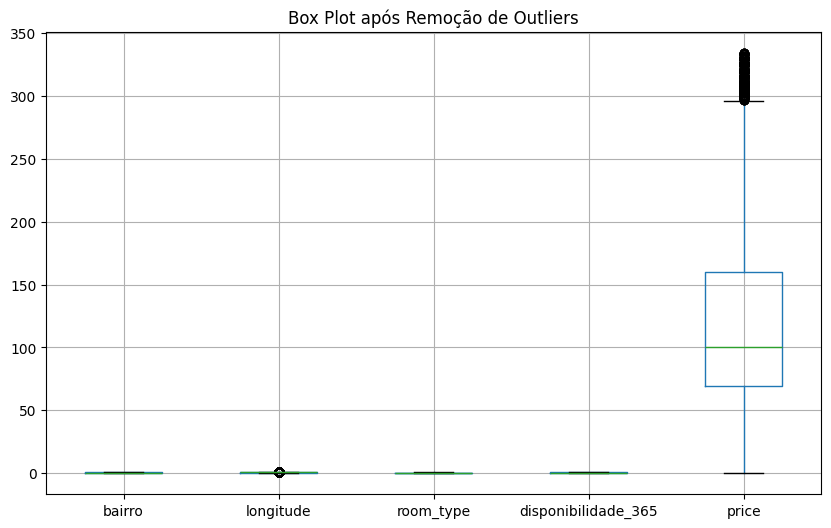

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_model_scaled.boxplot()
plt.title('Box Plot após Remoção de Outliers')
plt.show()


Separação da base de dados para treino e teste, usando 80% para treino e 20% para teste

In [28]:
from sklearn.model_selection import train_test_split

y = df_model_scaled['price']
X = df_model_scaled.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


## Regressão linear

### Métricas analisadas 

#### Coeficiente de Determinação (R2)
    representa o percentual da  variância dos dados que é explicado pelo modelo, quanto mais perto de 1, mais explicativo é o modelo em relação aos dados previstos
#### Raiz do Erro Quadrático Médio (RMSE)
    mede a diferença média entre os dados previstos e os dados reais. Utilizado por manter a métrica na mesma escala, sendo mais fácil de interpretar


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

LR = LinearRegression()
LR.fit(X_train, y_train)
print('score', LR.score(X_train, y_train))
y_pred = LR.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred) 
                               
print("Coeficiente de Determinação (R2):", r2)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)


score 0.46393914126328195
Coeficiente de Determinação (R2): 0.47193043419775693
Raiz do Erro Quadrático Médio (RMSE): 49.6838795858513


As métricas não ficaram tão boas, provavelmente por conta da baixa correlação entre os atributos e o valor alvo

R2 - 0.47 indica um ajuste médio, porém parte da variabilidade dos dados não são explicadas pelo modelo

RMSE - 49 indica que em média, a diferença entre os valores previstos e o valor real é de 49 na escala do valor alvo, no caso em dolares

## Predizendo o preço do anúncio 

Observando os dados passados para a predição na base de dados original, o preço do anúncio é de 225.
O valor previsto pelo modelo foi de 184
diferença nesse caso ficou de 41 dolares 


O valor previsto tem uma diferença de 41 dolares, aproximado do valor do RMSE

In [30]:
import pandas as pd
if 'price' in colunas_para_manter:
    colunas_para_manter.remove('price')

df_predicao_scaled_limpo = df_predicao_scaled[colunas_para_manter]

predicted_price = LR.predict(df_predicao_scaled_limpo)

print(f'Preço Previsto: {round(predicted_price[0])}')

dado = df_original[df_original['nome'] == df_predicao_original['nome'].values[0]]
print('valor preço do anuncio:', dado['price'].item())


Preço Previsto: 184
valor preço do anuncio: 225


In [68]:
import pickle
with open('modelo_regressão.pkl', 'wb') as file:
    pickle.dump(LR, file)